# Credit Card Customer Segmentation

#### Table of Contents
* [Introduction](#1)
* [Dataset Exploration](#2)
* [Correlation matrix](#3)
* [Frequencies](#4)
* [Feature Engineering](#5)
* [Scaling the Data](#6)
* [Choosing K](#7)
* [Result Analysis](#8)
* [Conclusion](#9)
* [K=6 Analysis](#10)

#### Introduction <a class='anchor' id='1'></a>

In this project, we will work on a dataset containing information about a credit card company's clients.

We will use this dataset and K-means algorithm to segment customers in order to help the credit card company explore different business strategies.

We will go through the following steps:

>Analyze the dataset;

>Prepare the data for modeling;

>Find an appropriate number of clusters;

>Segment the data;

>Interpret and explain the results.

#### Dataset Exploration <a class='anchor' id='2'></a>

In [232]:
#Import libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [233]:
#Import dataset
customer = pd.read_csv("D:/DataQuest/customer_segmentation.csv")

Here's the data dictionary:

>customer_id: unique identifier for each customer.

>age: customer age in years.

>gender: customer gender (M or F).

>dependent_count: number of dependents of each customer.

>education_level: level of education ("High School", "Graduate", etc.).

>marital_status: marital status ("Single", "Married", etc.).

>estimated_income: the estimated income for the customer projected by the data science team.

>months_on_book: time as a customer in months.

>total_relationship_count: number of times the customer contacted the company.

>months_inactive_12_mon: number of months the customer did not use the credit card in the last 12 months.

>credit_limit: customer's credit limit.

>total_trans_amount: the overall amount of money spent on the card by the customer.

>total_trans_count: the overall number of times the customer used the card.

>avg_utilization_ratio: daily average utilization ratio.

In [234]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

In [235]:
customer.isnull().sum()

customer_id                 0
age                         0
gender                      0
dependent_count             0
education_level             0
marital_status              0
estimated_income            0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
credit_limit                0
total_trans_amount          0
total_trans_count           0
avg_utilization_ratio       0
dtype: int64

In [236]:
customer.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


#### Correlation matrix <a class='anchor' id='3'></a>

In [237]:
corr_matrix = customer.select_dtypes(exclude=['object']).corr()
corr_matrix = corr_matrix.map(lambda x: x if x >0.3 or x < -0.3 else None)
corr_matrix

,customer_id,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
customer_id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,1.000000,NaN,NaN,0.788912,NaN,NaN,NaN,NaN,NaN,NaN
dependent_count,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
estimated_income,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.515863,NaN,NaN,NaN
months_on_book,NaN,0.788912,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
total_relationship_count,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,-0.347229,NaN,NaN
months_inactive_12_mon,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
credit_limit,NaN,NaN,NaN,0.515863,NaN,NaN,NaN,1.000000,NaN,NaN,-0.482965
total_trans_amount,NaN,NaN,NaN,NaN,NaN,-0.347229,NaN,NaN,1.000000,0.807192,NaN
total_trans_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.807192,1.000000,NaN


We see a few correlation here.

Age and months as a customer have high correlation.

Credit limit and estimated income also have high correlation.

Total transaction amount and number of times company contacted have high negative correlation.

Average utilization has negative correlation with credit limit.

Total transaction count and amount have high positive correlation.

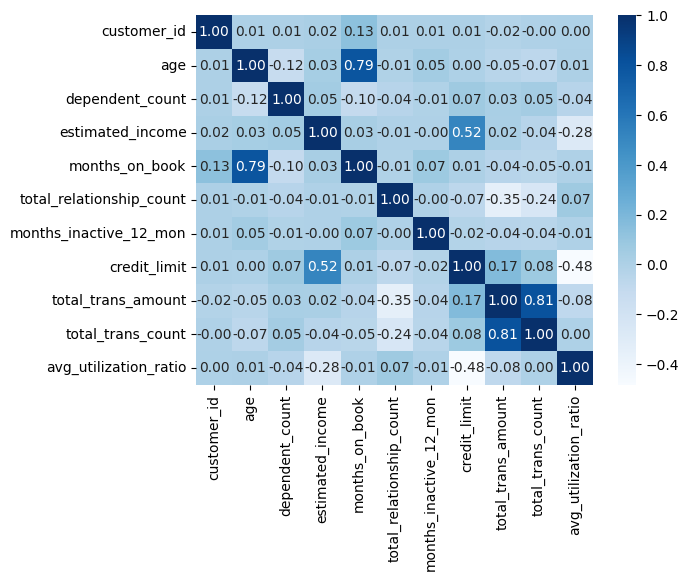

In [238]:
#Heatmap
corr_matrix = customer.select_dtypes(exclude=['object']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.show()

#### Frequencies <a class='anchor' id='4'></a>

In [239]:
freq = customer.select_dtypes(exclude=['object'])
print(freq.columns)

Index(['customer_id', 'age', 'dependent_count', 'estimated_income',
       'months_on_book', 'total_relationship_count', 'months_inactive_12_mon',
       'credit_limit', 'total_trans_amount', 'total_trans_count',
       'avg_utilization_ratio'],
      dtype='object')


In [240]:
freq = freq.drop('customer_id', axis=1)

C:\Users\ih371\AppData\Local\Temp\ipykernel_26448\3716125368.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  freq.hist(ax=ax)


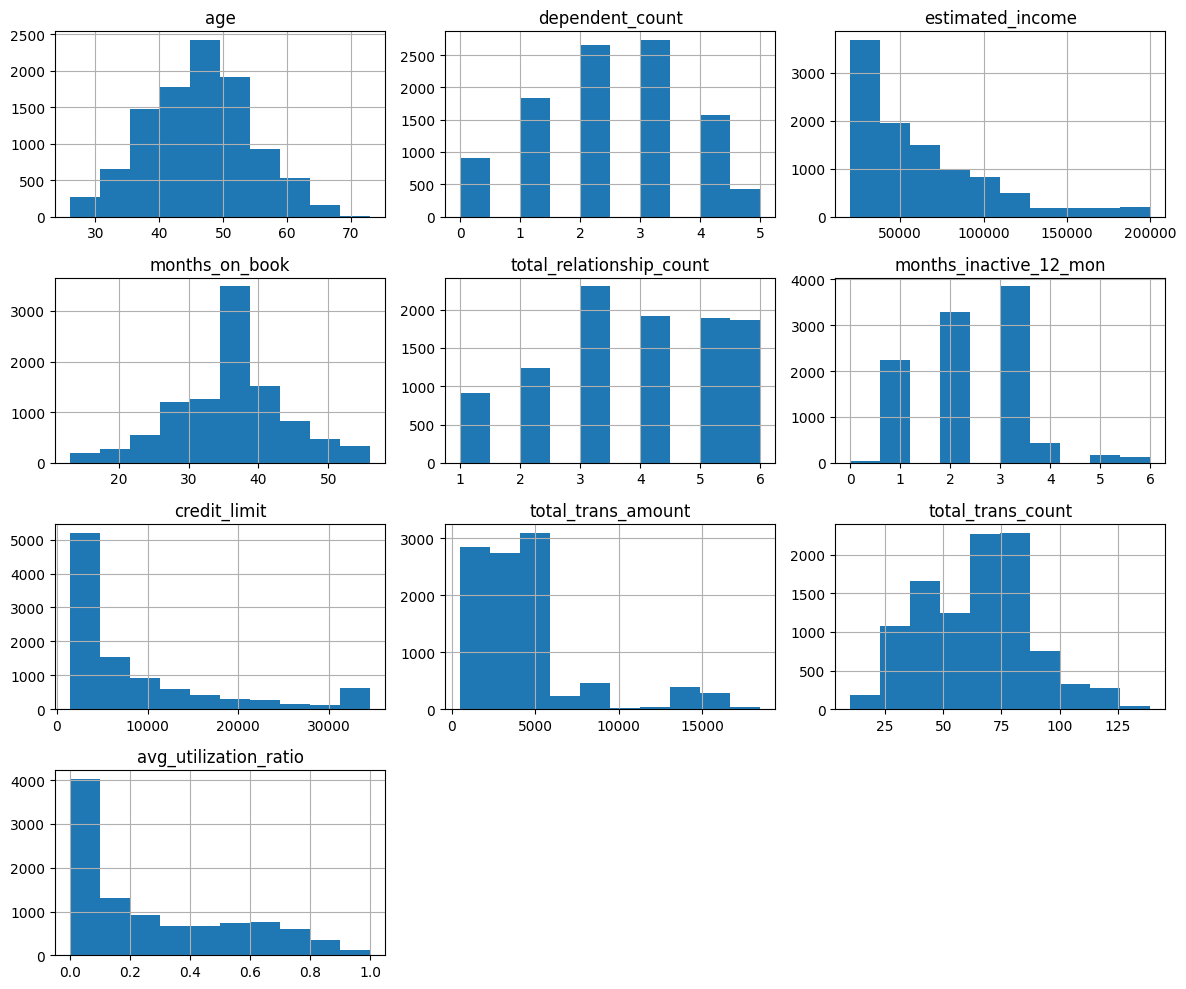

In [241]:
fig, ax = plt.subplots(figsize=(12, 10))
freq.hist(ax=ax)
plt.tight_layout()
plt.show()

#### Feature Engineering <a class='anchor' id='5'></a>

We will need to deal with the categorical columns.

In [242]:
customer.select_dtypes(include=['object']).columns

Index(['gender', 'education_level', 'marital_status'], dtype='object')

In [243]:
customer['education_level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Post-Graduate',
       'College', 'Doctorate'], dtype=object)

In [244]:
customer['marital_status'].unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

Gender - we can replace this with 1/0 for Male/Female

Education_level - there are 6 unique values, we may need to rank this.

marital_status - 4 values (nominal)

In [245]:
customer_mod = customer.copy() #Create copy

In [246]:
#Fix gender column
customer_mod['gender'] = np.where(customer_mod['gender']=='M',1,0)
customer_mod['gender'].value_counts()

gender
0    5358
1    4769
Name: count, dtype: int64

In [247]:
#Fix education level
education_map = {'Uneducated':0, 'High School':1,'College':2,'Graduate':3,'Post-Graduate':4,'Doctorate':5}
customer_mod['education_level'] = customer_mod['education_level'].replace(education_map)
customer_mod['education_level'].value_counts()

education_level
3    3685
1    2351
0    1755
2    1192
4     616
5     528
Name: count, dtype: int64

For marital_status we will need to create dummy variables as these are nominal data.

In [248]:
dummies_in = pd.get_dummies(data=customer_mod, columns=['marital_status'],prefix='marital_status') #if data = dataframe, the original will be replace. if only target column selected then it will create new df
dummies_in.iloc[:,-4:] = dummies_in.iloc[:,-4:].astype(int)
dummies_in.head()

,customer_id,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown
0,768805383,45,1,3,1,69000,39,5,1,12691.0,1144,42,0.061,0,1,0,0
1,818770008,49,0,5,3,24000,44,6,1,8256.0,1291,33,0.105,0,0,1,0
2,713982108,51,1,3,3,93000,36,4,1,3418.0,1887,20,0.000,0,1,0,0
3,769911858,40,0,4,1,37000,34,3,4,3313.0,1171,20,0.760,0,0,0,1
4,709106358,40,1,3,0,65000,21,5,1,4716.0,816,28,0.000,0,1,0,0


#### Scaling the Data <a class='anchor' id='6'></a>

As we are using numeric data with widely different scales, we have to normalize them before using kmeans.

In [249]:
#Prepare dataframe
dummies_in = dummies_in.drop('customer_id',axis=1)
dummies_in.head()

,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown
0,45,1,3,1,69000,39,5,1,12691.0,1144,42,0.061,0,1,0,0
1,49,0,5,3,24000,44,6,1,8256.0,1291,33,0.105,0,0,1,0
2,51,1,3,3,93000,36,4,1,3418.0,1887,20,0.000,0,1,0,0
3,40,0,4,1,37000,34,3,4,3313.0,1171,20,0.760,0,0,0,1
4,40,1,3,0,65000,21,5,1,4716.0,816,28,0.000,0,1,0,0


In [250]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #instantiate scaler
scaled_data = scaler.fit_transform(dummies_in) #normalize df, but it returns array
scaled_df = pd.DataFrame(scaled_data, columns=dummies_in.columns) #change array back into df, but need to supply column names
scaled_df.head()


,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown
0,-0.165406,1.059956,0.503368,-0.752211,0.175810,0.384621,0.763943,-1.327136,0.446622,-0.959707,-0.973895,-0.775882,-0.282405,1.077338,-0.798507,-0.282609
1,0.333570,-0.943436,2.043199,0.662787,-0.967166,1.010715,1.407306,-1.327136,-0.041367,-0.916433,-1.357340,-0.616276,-0.282405,-0.928214,1.252337,-0.282609
2,0.583058,1.059956,0.503368,0.662787,0.785397,0.008965,0.120579,-1.327136,-0.573698,-0.740982,-1.911206,-0.997155,-0.282405,1.077338,-0.798507,-0.282609
3,-0.789126,-0.943436,1.273283,-0.752211,-0.636973,-0.241473,-0.522785,1.641478,-0.585251,-0.951758,-1.911206,1.759686,-0.282405,-0.928214,-0.798507,3.538459
4,-0.789126,1.059956,0.503368,-1.459710,0.074212,-1.869317,0.763943,-1.327136,-0.430877,-1.056263,-1.570365,-0.997155,-0.282405,1.077338,-0.798507,-0.282609


#### Choosing K <a class='anchor' id='7'></a>

Now our dataset is ready for machine learning. The next step is to decide the best number of clusters to use in the segmentation according to the inertia metric.

We'll have to create several models and compute the inertia from each of them. Then, we'll be able to plot the Elbow Curve and decide the number of clusters we'll use to segment the customers. Once we do all that, we can perform the real clusterization.

In [251]:
def plot_elbow_curve(df, max_clusters=10):
    inertias = []
    for x in range(1,max_clusters+1):
        model = KMeans(n_clusters=x, n_init='auto')
        cluster = model.fit_predict(df)
        inertias.append(model.inertia_)
    
    plt.figure(figsize=(12,8))
    plt.plot(range(1,max_clusters+1), inertias, marker='o')
    plt.xticks(ticks=range(1, max_clusters+1), labels=range(1, max_clusters+1))
    plt.title('Inertia vs Number of Clusters')
    plt.tight_layout()
    plt.show()
    return inertias

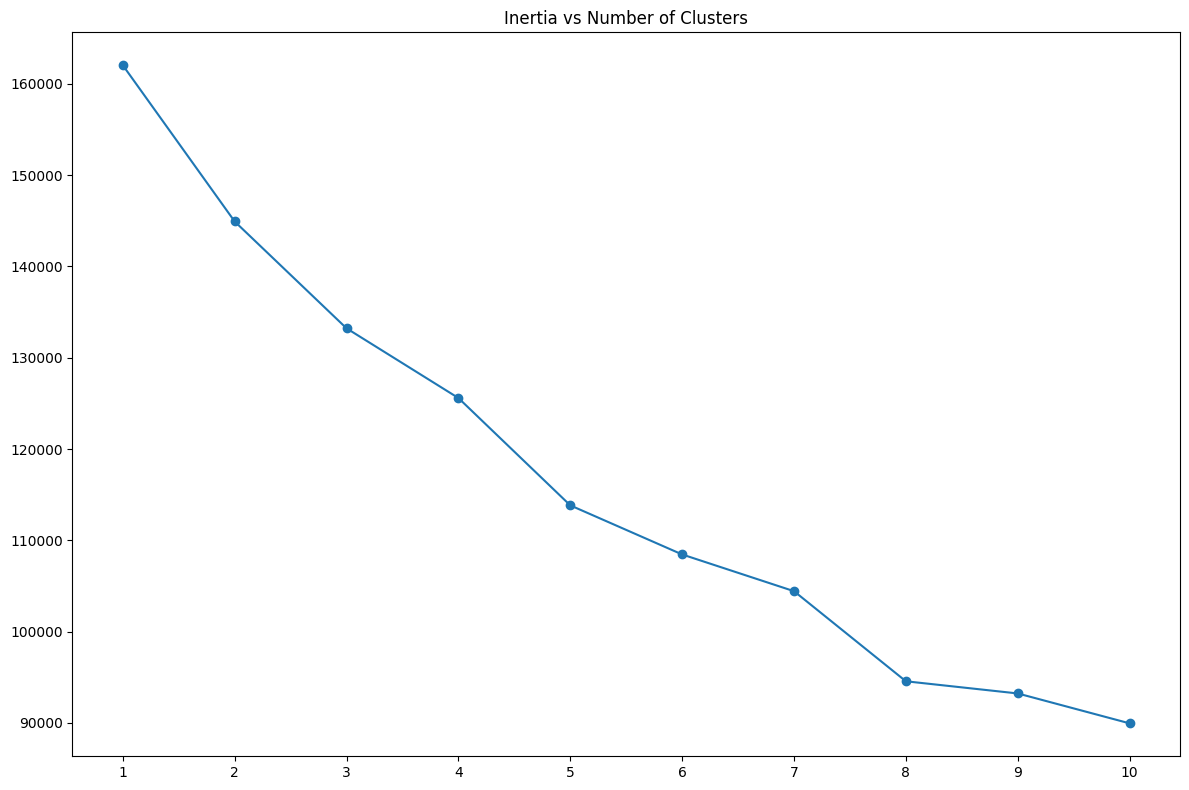

[162031.99999999997, 144918.83728630748, 133218.40739612016, 125584.81836884766, 113828.67772216978, 108452.62298377191, 104429.76455590111, 94563.41098442218, 93230.44394694634, 89954.15502506962]


In [252]:
inertias = plot_elbow_curve(scaled_df)
print(inertias)

[10.561594446586167, 8.073781234575788, 5.730130825370329, 9.36111609617463, 4.722935244420226, 3.709323312975798, 9.447836652162025, 1.4096012650129843, 3.514183546890677]


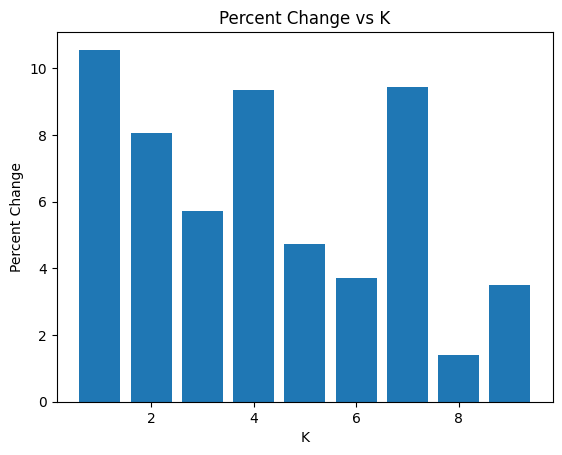

In [253]:
changes = []
for index,x in enumerate(inertias):
    if index == 0:
        prev_x = x
        continue
    else:
        change = 100* (x - prev_x)/prev_x
        changes.append(abs(change))
        prev_x = x

plt.bar(x=range(1,10),height=changes)
plt.ylabel('Percent Change')
plt.xlabel('K')
plt.title('Percent Change vs K')
print(changes)


We see that the percent change starts to decrease around k=5 to 6.

We will choose K=5 for this project for now and see how our analysis turns out.

In [254]:
model = KMeans(n_clusters=5, n_init="auto")
cluster = model.fit_predict(scaled_df)
scaled_df['cluster'] = cluster + 1
dummies_in['cluster'] = cluster + 1
customer['cluster'] = cluster + 1
print(scaled_df['cluster'].value_counts())

cluster
3    3094
2    2864
5    1830
4    1592
1     747
Name: count, dtype: int64


In [255]:
print("Inertia (Sum of Squared Distances):", model.inertia_)
print("Number of Clusters:", model.n_clusters)
print("Cluster Centers:\n", model.cluster_centers_)

Inertia (Sum of Squared Distances): 116597.09113633526
Number of Clusters: 5
Cluster Centers:
 [[-1.51044157e-01 -1.81746361e-02  2.10115705e-02 -1.44042356e-02
  -1.85793629e-02 -9.73122098e-02  3.53139996e-02  6.81962493e-03
   7.62443277e-02  3.54563382e-02  8.60972291e-02 -6.41062309e-02
   3.54101257e+00 -9.28213813e-01 -7.98506854e-01 -2.82608874e-01]
 [-2.32652428e-01 -3.08026512e-01  3.21778309e-02  8.11581535e-03
  -3.55318940e-01 -2.25088889e-01  1.60393224e-03 -2.34268792e-03
  -3.78514334e-01 -7.82793347e-03  1.17200697e-01  1.60822995e-01
  -2.82405097e-01 -9.28213813e-01  1.25233740e+00 -2.82608874e-01]
 [-4.23648234e-01 -2.73478827e-01  2.62831855e-01  7.68676548e-03
  -3.64010846e-01 -3.94635243e-01 -7.59428560e-03 -3.03674622e-02
  -4.04503487e-01 -9.85190208e-04  3.86079262e-02  1.99148225e-01
  -2.82405097e-01  7.63402970e-01 -7.98506854e-01  3.15514347e-01]
 [ 1.24002248e+00 -2.29585946e-02 -7.64015971e-01  3.22189710e-02
  -1.14695511e-01  1.14136422e+00  2.5442778

#### Result Analysis <a class='anchor' id='8'></a>

In [256]:
customer.select_dtypes(exclude=['object']).groupby('cluster').mean()

,customer_id,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
cluster,,,,,,,,,,,
1,7.409204e+08,45.115127,2.373494,61346.720214,35.151272,3.867470,2.348059,9324.887149,4524.530120,66.879518,0.257221
2,7.377609e+08,44.447975,2.389665,48061.801676,34.121858,3.814944,2.338687,5195.350035,4378.737081,67.622905,0.319168
3,7.380928e+08,42.936005,2.686813,47742.404654,32.785068,3.799612,2.310924,4954.395572,4403.673239,65.781836,0.329778
4,7.427217e+08,56.272613,1.353643,57632.537688,45.039573,4.211055,2.427136,5295.488945,2704.667714,49.985553,0.338500
5,7.394343e+08,46.837705,2.554645,112418.032787,36.461202,3.461749,2.318579,22847.706885,5873.693443,71.085792,0.064690


['age', 'dependent_count', 'estimated_income', 'months_on_book', 'total_relationship_count', 'months_inactive_12_mon', 'credit_limit', 'total_trans_amount', 'total_trans_count', 'avg_utilization_ratio']


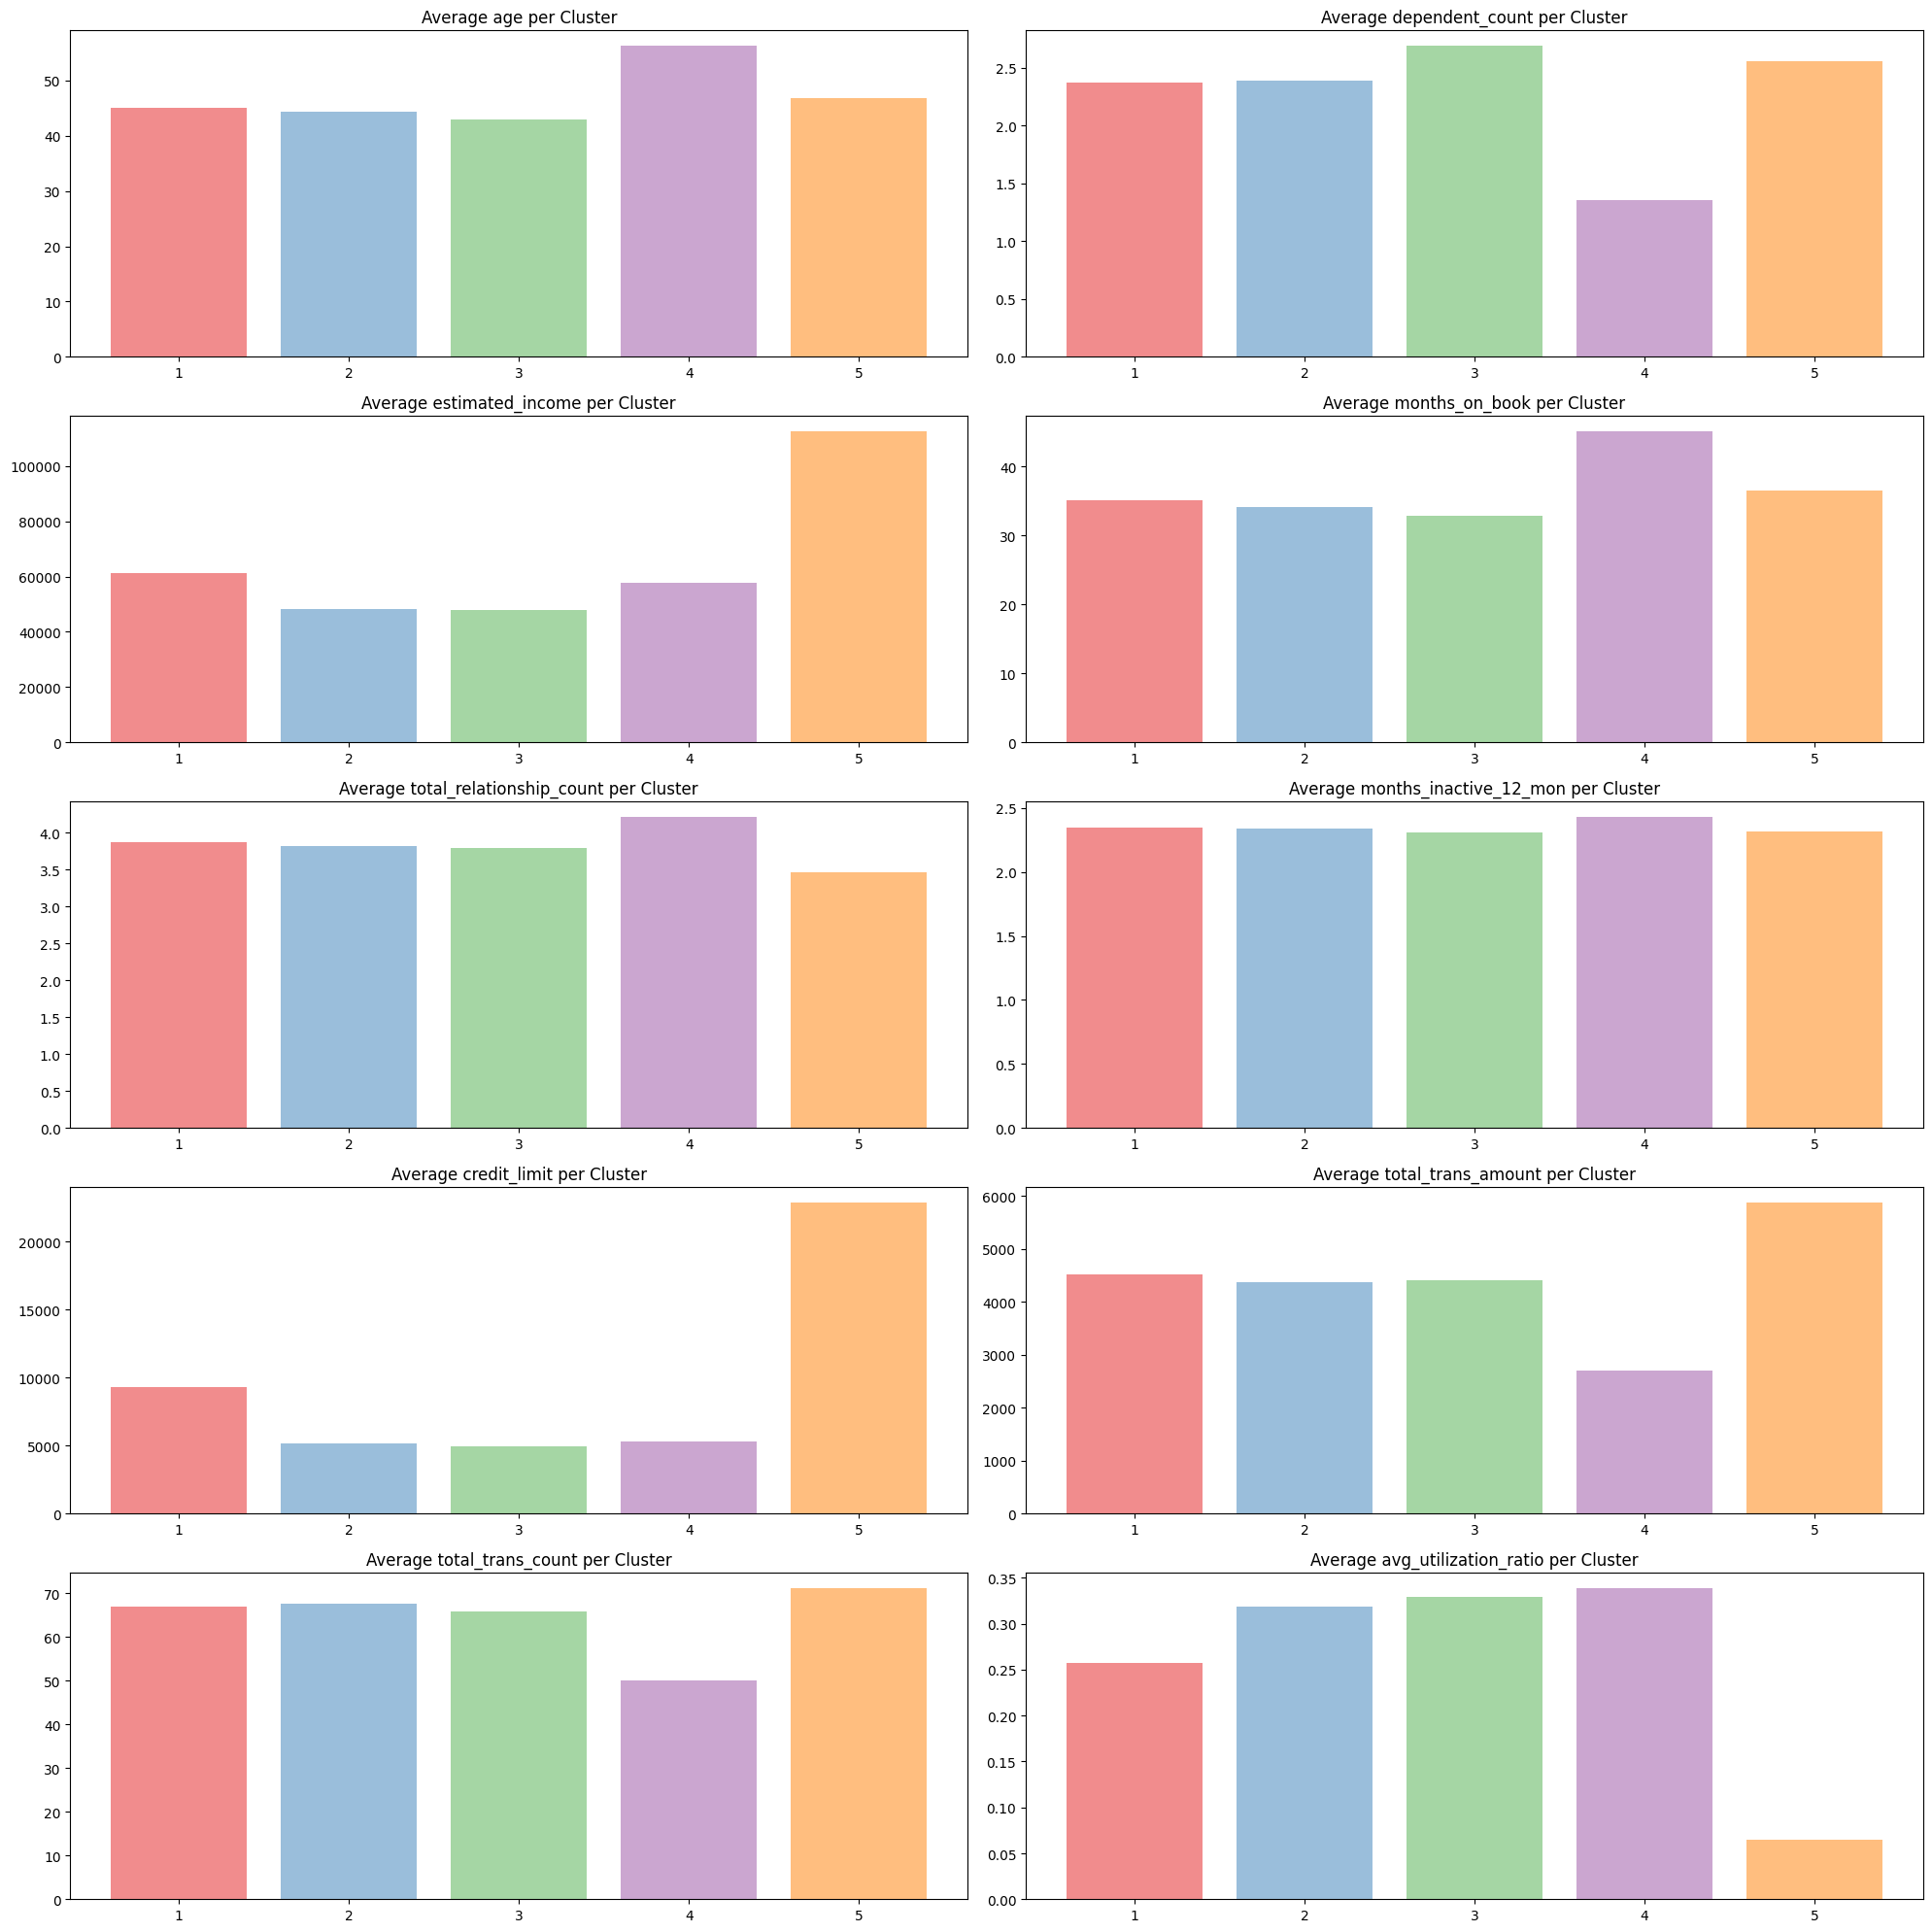

In [257]:
to_drop = ['gender','marital_status','education_level','cluster']
list = customer.columns.drop('customer_id')
for x in to_drop:
    list = list.drop(x)
list = list.tolist()
print(list)
fig = plt.figure(figsize=(20, 20))
for i,x in enumerate(list):
    average = customer.groupby('cluster')[x].mean().reset_index()
    ax = fig.add_subplot(5,2,i+1)
    ax.bar(x=average.iloc[:,0], height=average.iloc[:,1],color=sns.color_palette('Set1'), alpha=0.5)
    ax.set_title(f'Average {x} per Cluster')
    ax.xaxis.grid(False)
    
plt.tight_layout()
plt.show()

Cluster 5 has the more interesting characteristics.

The average utilization ratio is low yet total transaction count and amount is highest.
We also see the highest credit limit in cluster 4.

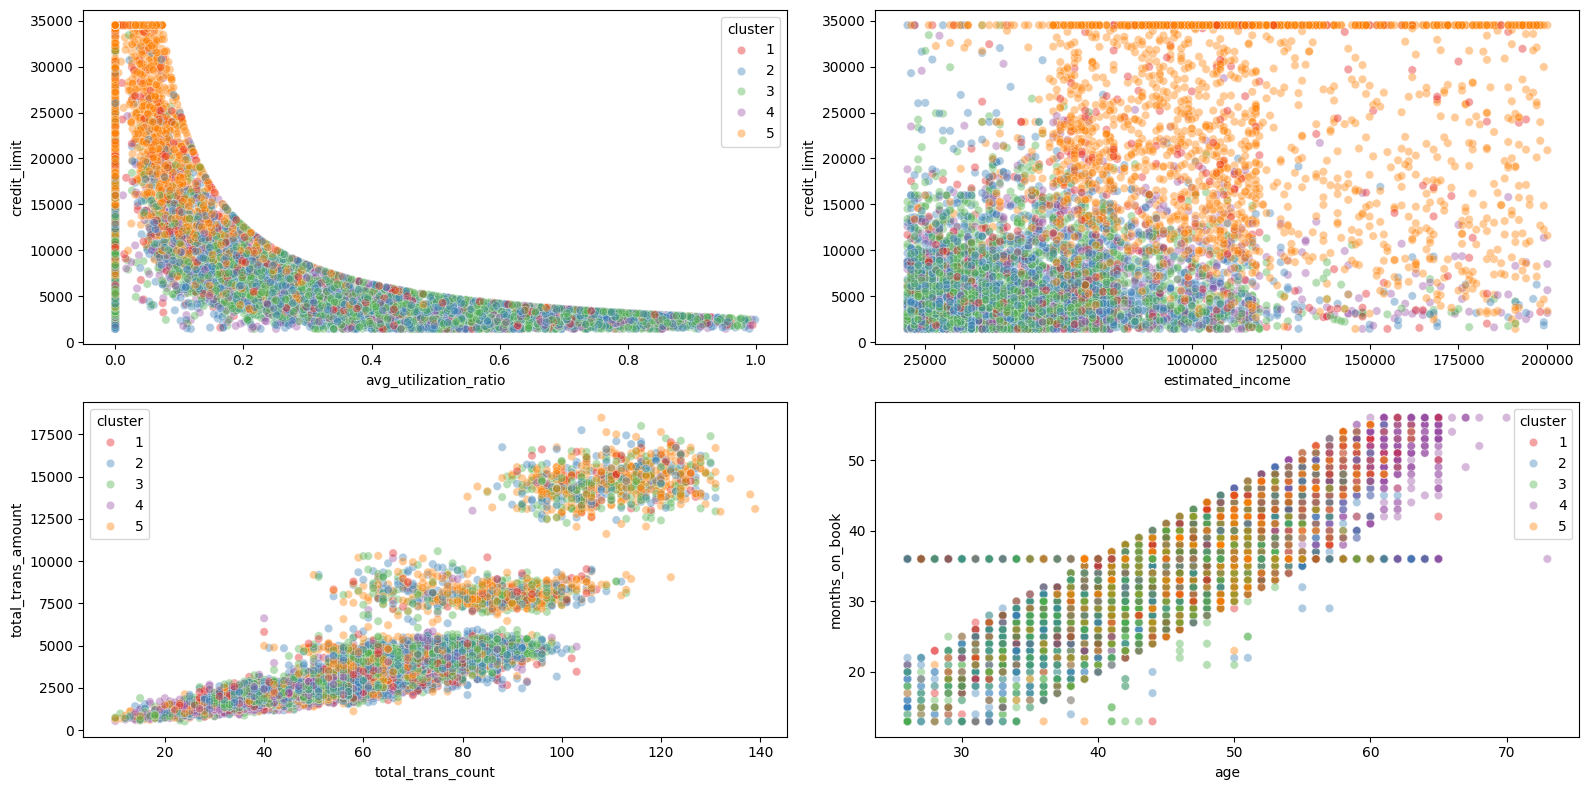

In [258]:
fig, axs = plt.subplots(2,2,figsize=(16,8))
sns.scatterplot(x='avg_utilization_ratio', y='credit_limit', hue='cluster', data=customer, palette='Set1', alpha=0.4, ax=axs[0][0])
sns.scatterplot(x='estimated_income', y='credit_limit', hue='cluster', data=customer, palette='Set1', alpha=0.4, ax=axs[0][1], legend=False)
sns.scatterplot(x='total_trans_count',y='total_trans_amount', hue='cluster', data=customer, palette='Set1', alpha=0.4, ax=axs[1][0])
sns.scatterplot(x='age',y='months_on_book', hue='cluster', data=customer, palette='Set1', alpha=0.4, ax=axs[1][1])
plt.tight_layout()
plt.show()

We look at specific characteristic pairs that have showed high Pearson's Correlation in our previous correlation matrix.
We see that cluster 5 are clustered around low avg_utilization_ratio but high credit_limit, with mostly mid to high estimate_income, from age 30-60, and have high total_transaction count and amount.

Next let's look at the categorical data.

In [259]:
cat_var = to_drop
cat_var.remove('cluster')
print(cat_var)

['gender', 'marital_status', 'education_level']


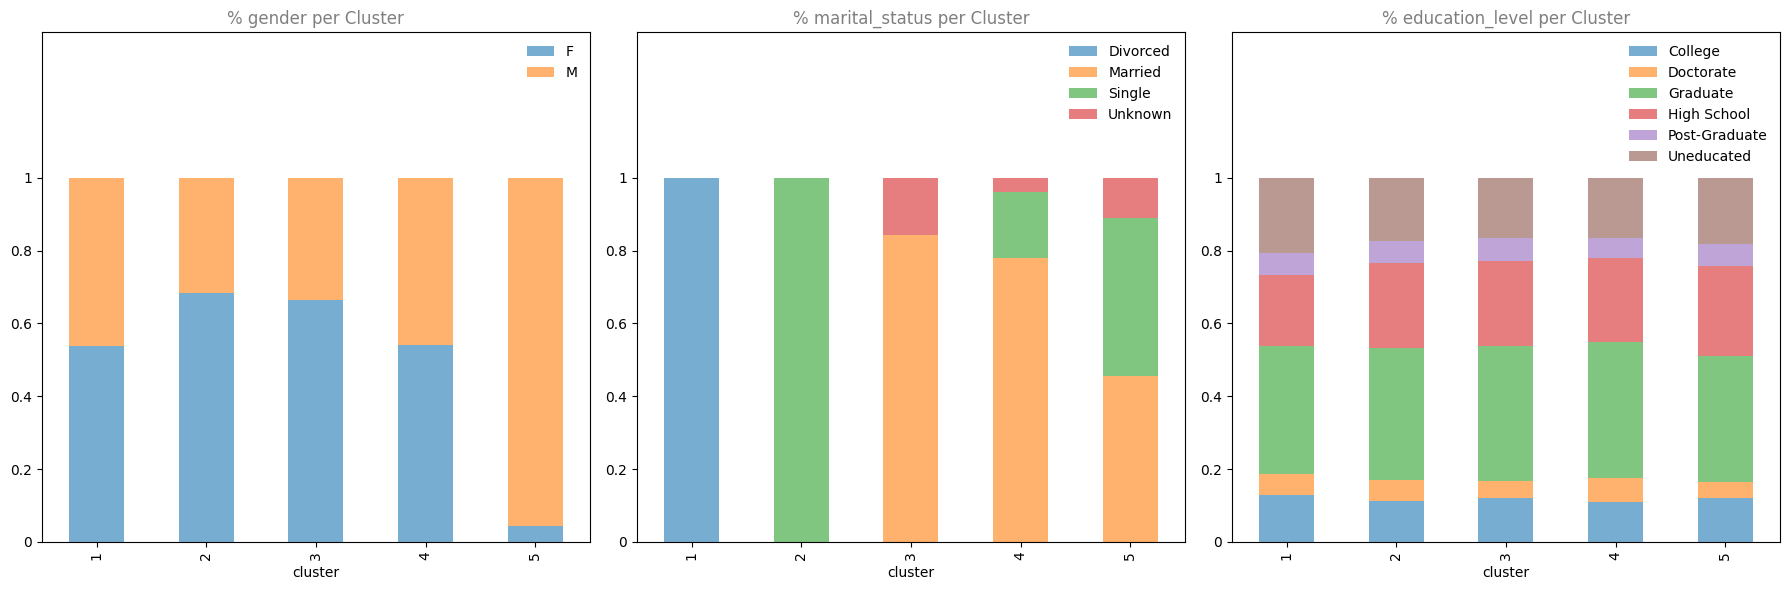

In [260]:
fig = plt.figure(figsize=(18, 6))
for i, x in enumerate(cat_var):
    plot_df = pd.crosstab(
    index=customer['cluster'], columns=customer[x],
    values=customer[x], aggfunc='size', normalize='index'
                        )
    ax = fig.add_subplot(1,3,i+1)
    plot_df.plot.bar(stacked=True, ax=ax, alpha=0.6)
    ax.set_title(f'% {x} per Cluster', alpha=0.5)

    ax.set_ylim(0, 1.4)
    ax.legend(frameon=False)
    ax.xaxis.grid(False)

    labels = [0, 0.2, 0.4, 0.6, 0.8, 1]
    ax.set_yticks(labels)
    ax.set_yticklabels(labels)
    
plt.tight_layout()
plt.show()

For the categorical data, education level surprisingly is evenly distributed among the 5 clusters.

We only see major differences in distrubtion between the gender in cluster 5 and marital_status across clusters.

#### Conclusion <a class='anchor' id='9'></a>

In this project, we have successfully segmented credit card customers using K-means clusterization. 

In brief:
- We have explored the different characteristics of the customers and prepared them for K-means clusterization via feature engineering. This included dummy variable creation and data normalization.
- Then, we calculated the inertias and generate an elbow plot to help us select a suitable K value for clusterization.
- We performed K-means clusterization.
- Then, we visualized the results via bar plot and relational plot.

As we can see, the K-means Clusterization is a useful tool for providing business insight to aid in business strategies.

#### K=6 Analysis <a class='anchor' id='10'></a>

In [261]:
model = KMeans(n_clusters=6, n_init='auto')
cluster = model.fit_predict(scaled_df)
scaled_df['cluster'] = cluster + 1
dummies_in['cluster'] = cluster + 1
customer['cluster'] = cluster + 1
print(scaled_df['cluster'].value_counts())

cluster
3    3966
5    1861
4    1577
2    1158
1     818
6     747
Name: count, dtype: int64


['age', 'dependent_count', 'estimated_income', 'months_on_book', 'total_relationship_count', 'months_inactive_12_mon', 'credit_limit', 'total_trans_amount', 'total_trans_count', 'avg_utilization_ratio']


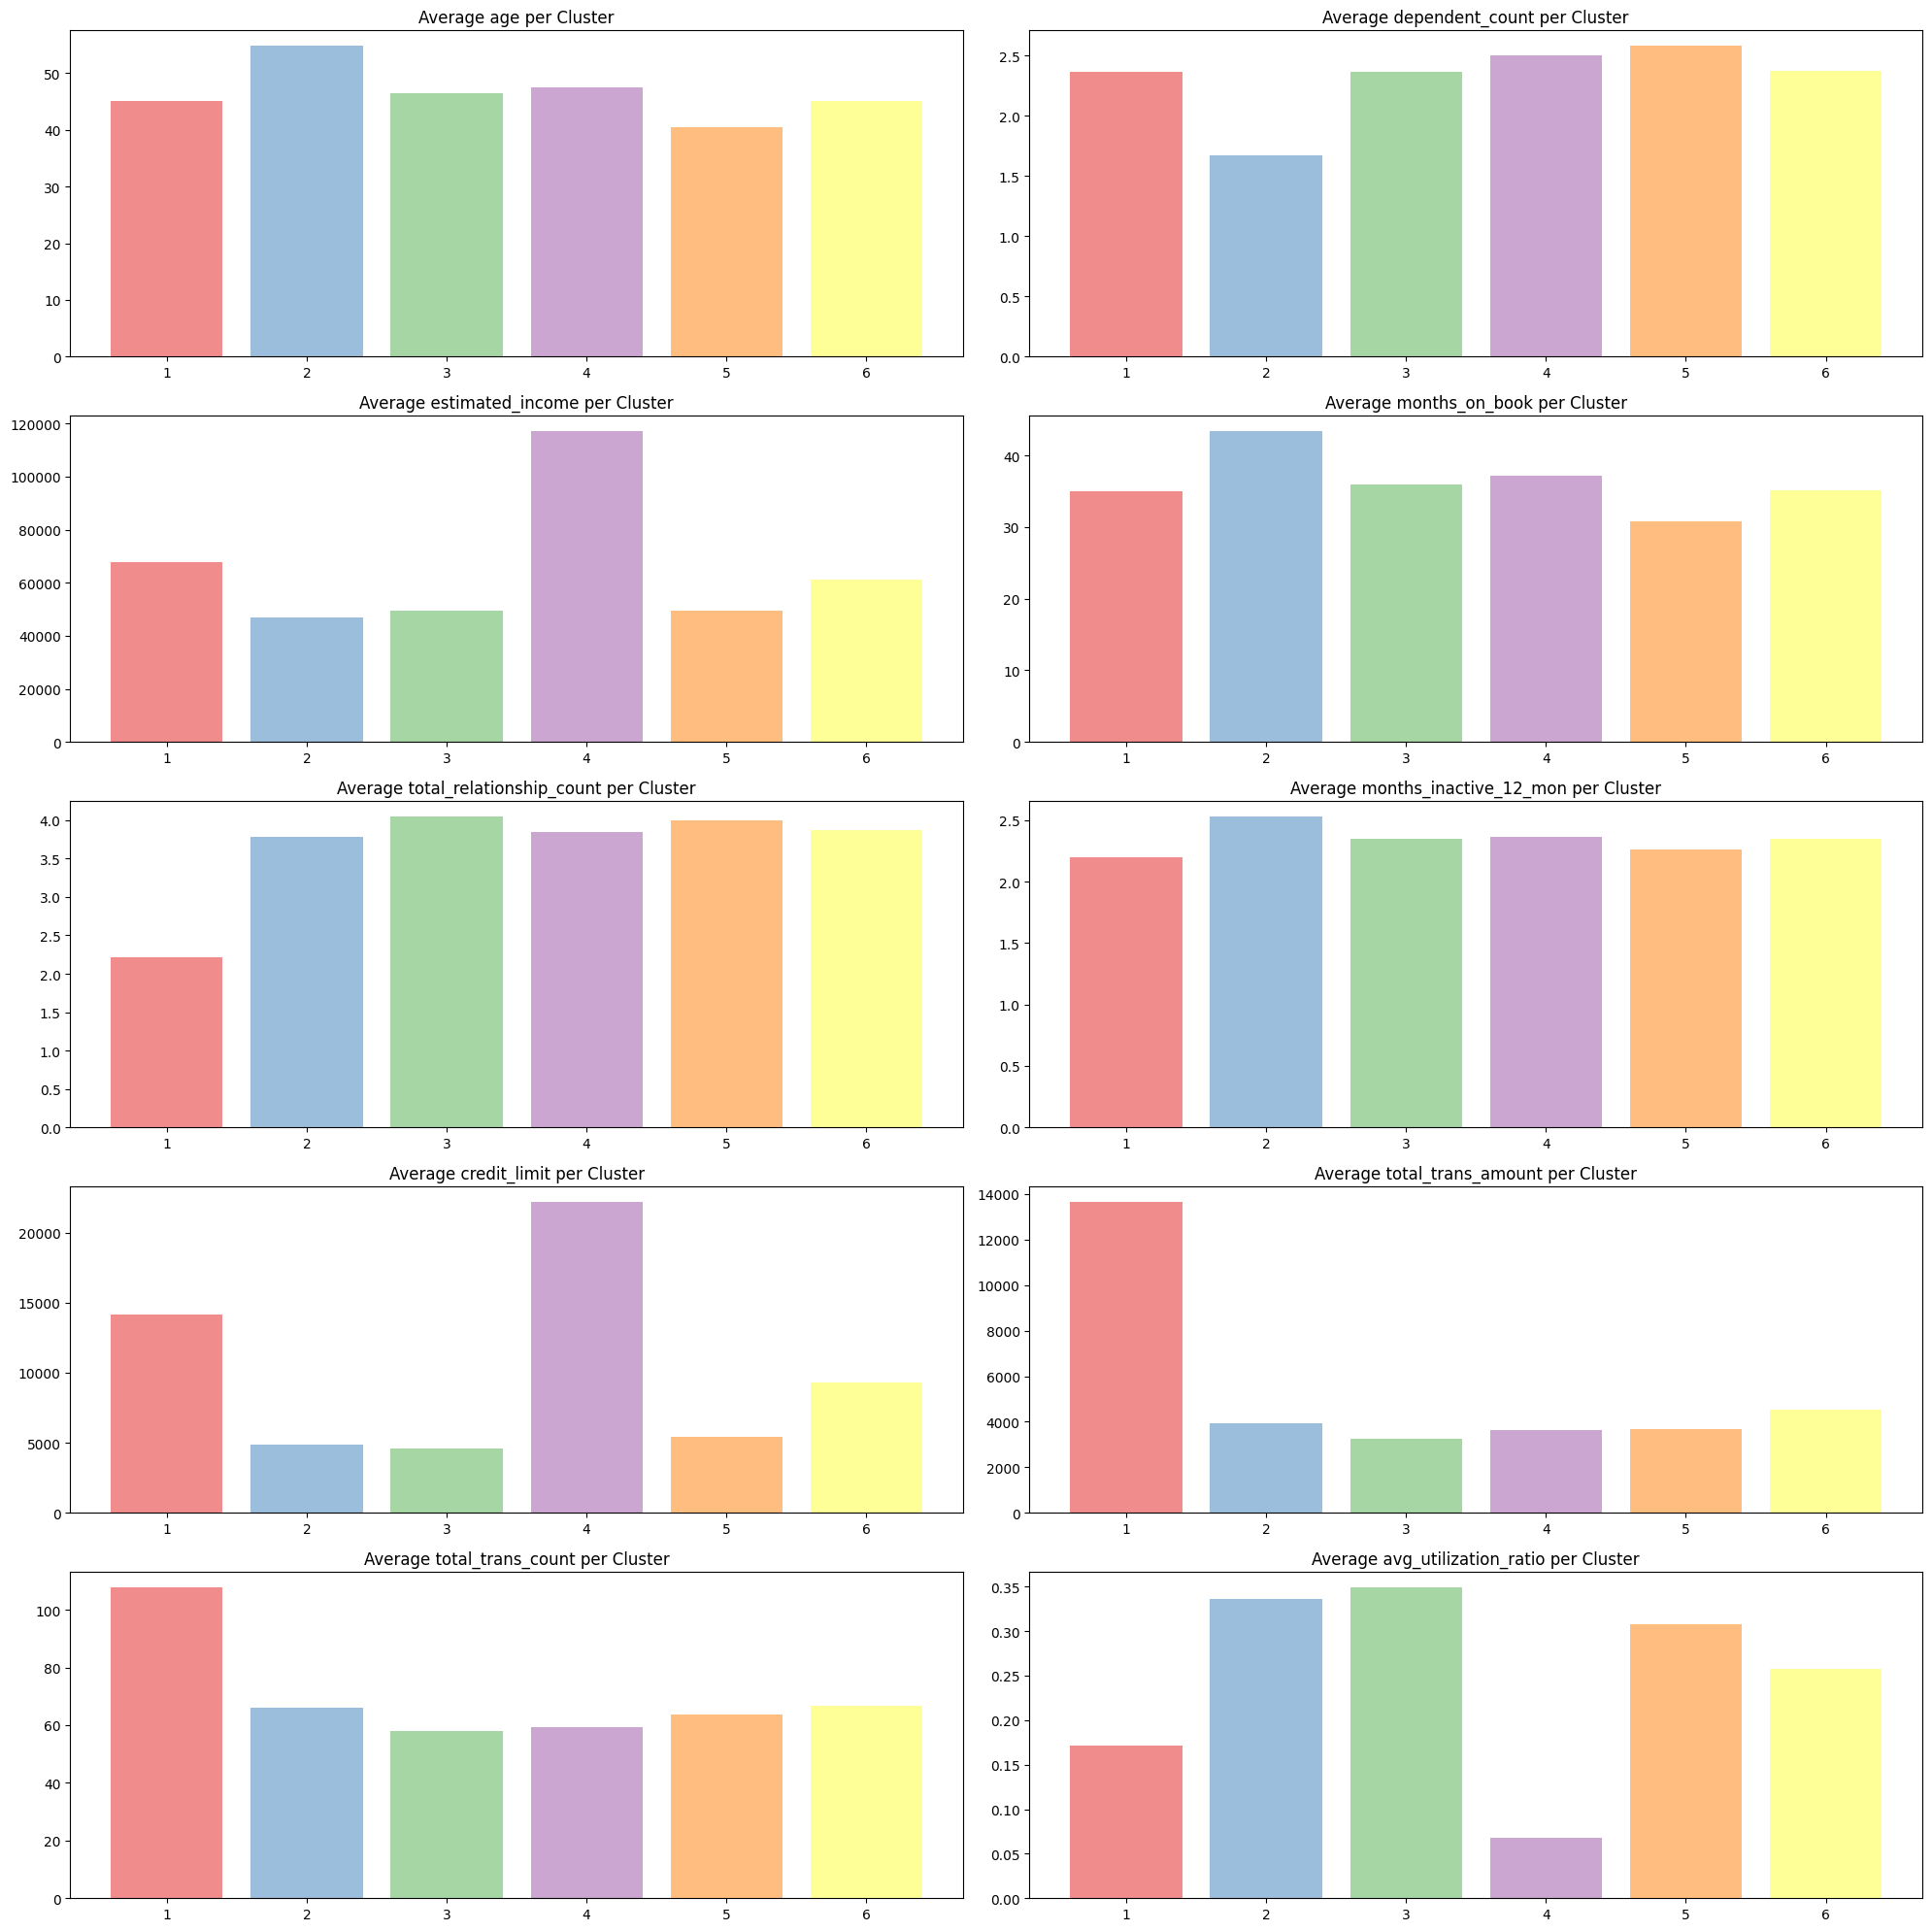

In [262]:
customer.select_dtypes(exclude=['object']).groupby('cluster').mean()
to_drop = ['gender','marital_status','education_level','cluster']
list = customer.columns.drop('customer_id')
for x in to_drop:
    list = list.drop(x)
list = list.tolist()
print(list)
fig = plt.figure(figsize=(20, 20))
for i,x in enumerate(list):
    average = customer.groupby('cluster')[x].mean().reset_index()
    ax = fig.add_subplot(5,2,i+1)
    ax.bar(x=average.iloc[:,0], height=average.iloc[:,1],color=sns.color_palette('Set1'), alpha=0.5)
    ax.set_title(f'Average {x} per Cluster')
    ax.xaxis.grid(False)
    
plt.tight_layout()
plt.show()

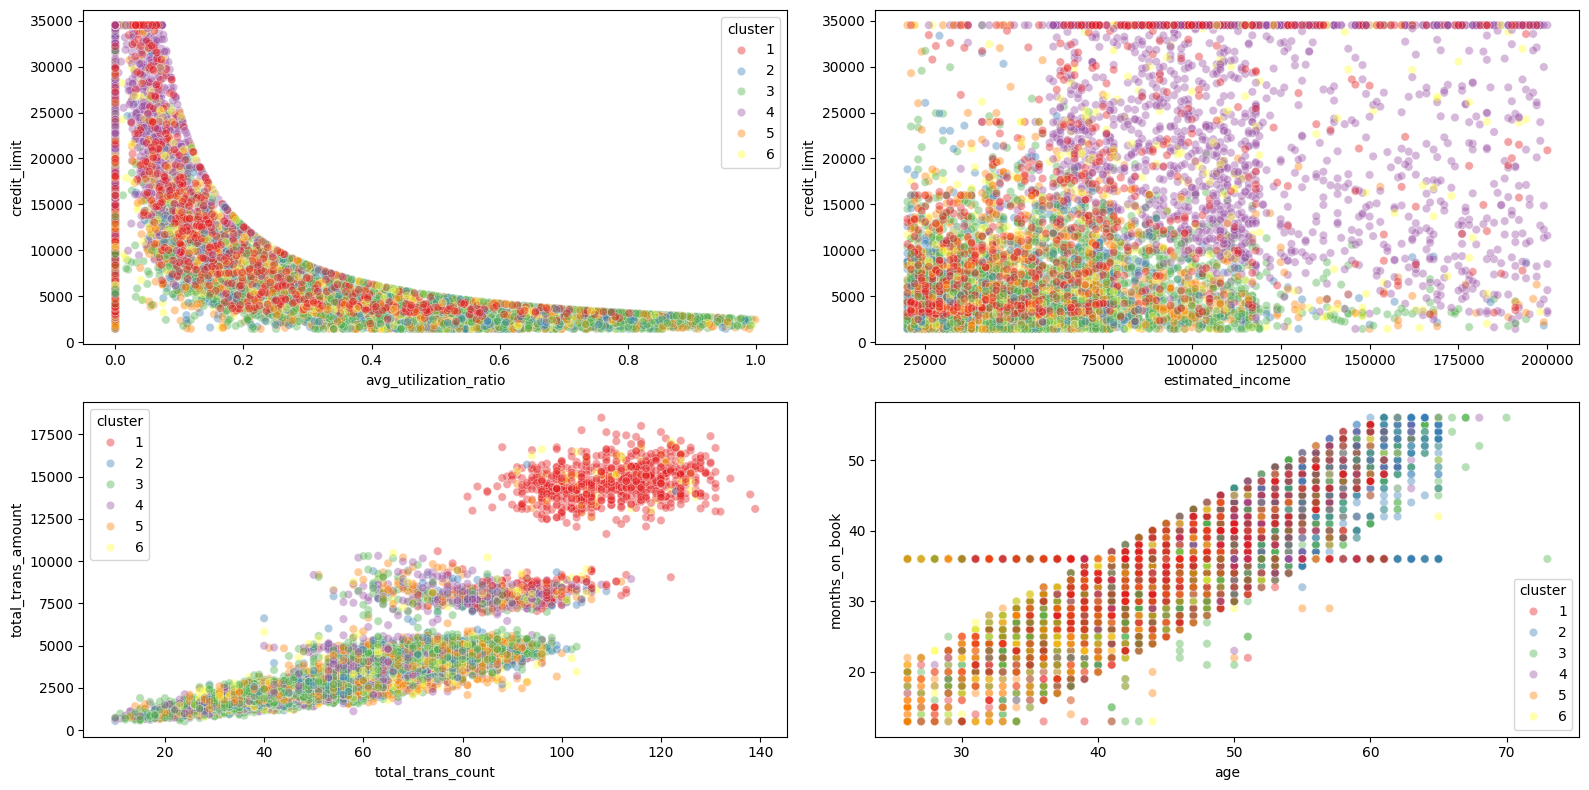

In [263]:
fig, axs = plt.subplots(2,2,figsize=(16,8))
sns.scatterplot(x='avg_utilization_ratio', y='credit_limit', hue='cluster', data=customer, palette='Set1', alpha=0.4, ax=axs[0][0])
sns.scatterplot(x='estimated_income', y='credit_limit', hue='cluster', data=customer, palette='Set1', alpha=0.4, ax=axs[0][1], legend=False)
sns.scatterplot(x='total_trans_count',y='total_trans_amount', hue='cluster', data=customer, palette='Set1', alpha=0.4, ax=axs[1][0])
sns.scatterplot(x='age',y='months_on_book', hue='cluster', data=customer, palette='Set1', alpha=0.4, ax=axs[1][1])
plt.tight_layout()
plt.show()

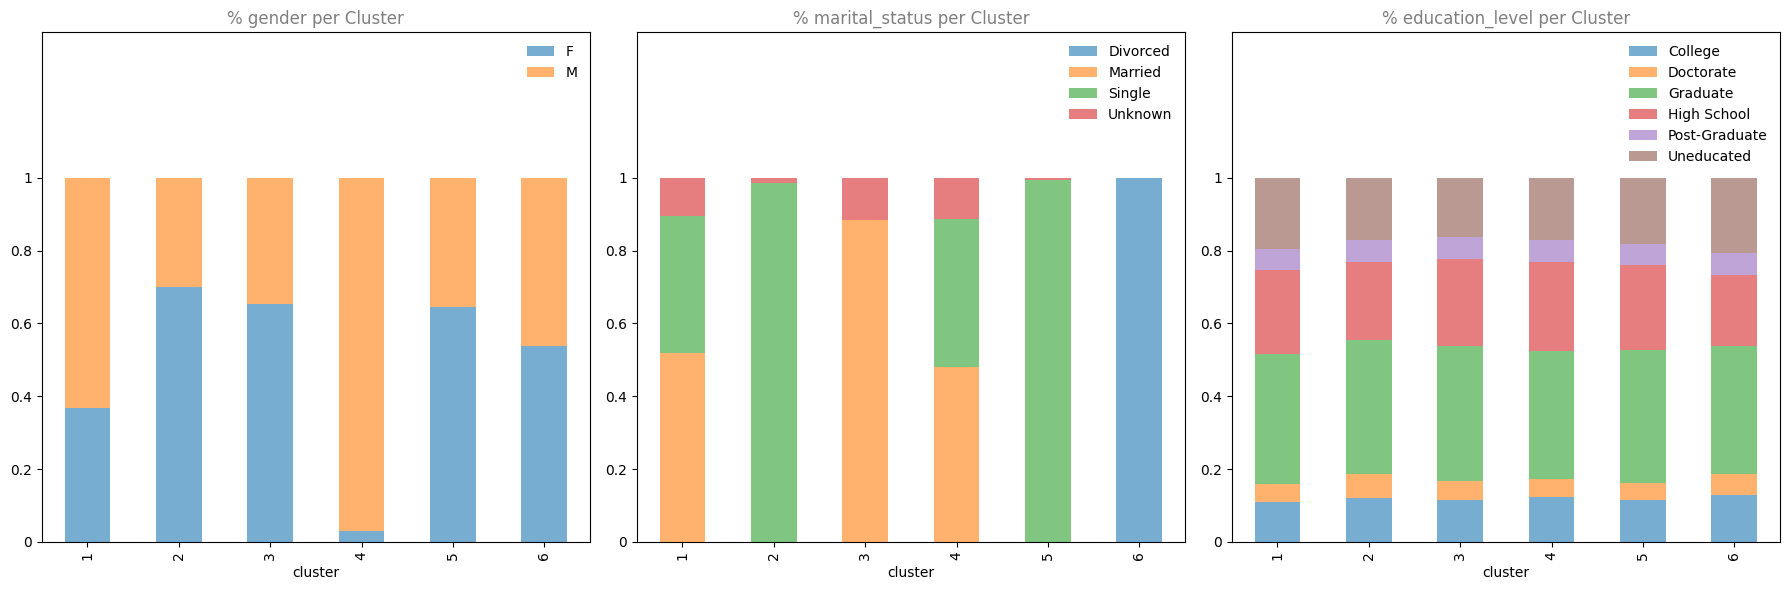

In [264]:
fig = plt.figure(figsize=(18, 6))
for i, x in enumerate(cat_var):
    plot_df = pd.crosstab(
    index=customer['cluster'], columns=customer[x],
    values=customer[x], aggfunc='size', normalize='index'
                        )
    ax = fig.add_subplot(1,3,i+1)
    plot_df.plot.bar(stacked=True, ax=ax, alpha=0.6)
    ax.set_title(f'% {x} per Cluster', alpha=0.5)

    ax.set_ylim(0, 1.4)
    ax.legend(frameon=False)
    ax.xaxis.grid(False)

    labels = [0, 0.2, 0.4, 0.6, 0.8, 1]
    ax.set_yticks(labels)
    ax.set_yticklabels(labels)
    
plt.tight_layout()
plt.show()

The clusters using k=6 appear to be more varied in characteristics.
Further analysis could be interesting, but we will stop here.